In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
dist_n = np.random.randn(500)

#anderson and ks test
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_p = np.random.poisson(1, 500)

print "poisson on normal", scipy.stats.kstest(dist_p,'norm')
print "poisson on normal", scipy.stats.anderson(dist_p, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

normal on normal (0.029366572149070125, 0.78163091832768494)
normal on normal (0.31643443150221628, array([ 0.571,  0.651,  0.781,  0.911,  1.083]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal (0.5, 0.0)
poisson on normal (30.069223630807755, array([ 0.571,  0.651,  0.781,  0.911,  1.083]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.083]


In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)
#notice the extra comma on the left side of the '=' sign: that tells numpy take the first two values returned, and throw away the rest

In [4]:
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "poisson on normal", scipy.stats.entropy(distpdf_p, scipy.stats.norm.pdf(bincenters_p)) 

normal on normal 0.0057218962151
poisson on normal 0.874580287982


In [ ]:
#Poisson normal has a high value,null hypothesis must be rejected.

In [5]:
#Binomial distribution 
narray = range(1,60,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

In [6]:
def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

In [7]:
p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 500)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    mybins=np.linspace(min(dist),max(dist), 5) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))

In [ ]:
#Try different plot types

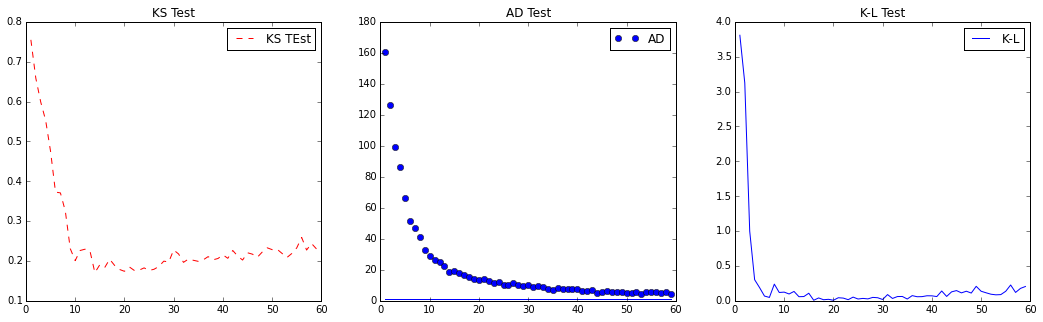

In [8]:
fig = pl.figure(figsize = (18,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, '--r', label='KS TEst')
plt.title('KS Test')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b, 'bo', label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
plt.title('AD Test')
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')
plt.title('K-L Test')
pl.legend()

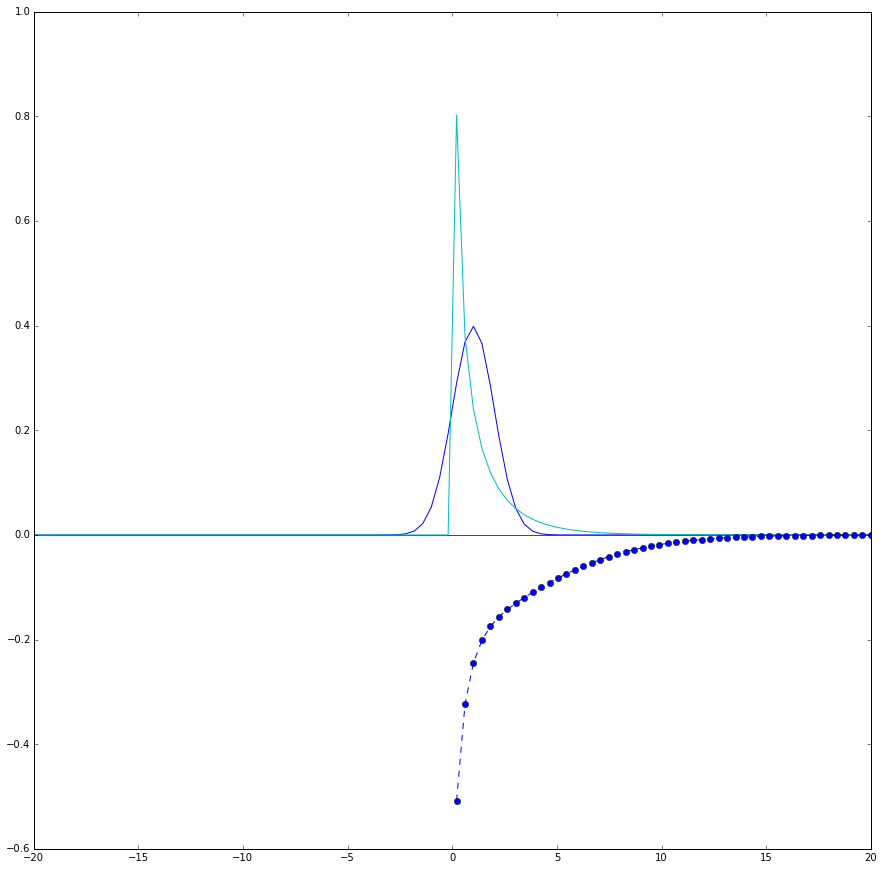

In [9]:
pl.figure(figsize=(15,15))

p = lambda x, mu : scipy.stats.distributions.poisson.pmf(x,mu)
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,50,50)

Dkl = lambda x ,mu, p :  p(x, mu)* np.log10(q(x, mu)) + p(x, mu) *np.log10(p(x, mu))

def model(x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

x=np.linspace(-20,20,100)
pl.plot(x, q(x,1), label='norm')
pl.plot(x, p(x,1), label='poisson')
pl.plot(x, Dkl(x, 1, p), '-.', label = 'KL - poisson')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))


pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--bo', label = 'KL - chi2')
